# Trend Visualizations for USA Immigration

## Table of Contents

1. [Introduction](#0)<br>
2. [Data Loading and Preparation](#1)<br>
3. [Total immigration trend, Linear fit for prediction and Country Wise analysis](#2)<br>
4. [Continent Wise Analysis](#3)<br>
5. [Development Status of Origin of the Immigrants](#4)<br>
6. [Conclusion](#5)<br>

<a id="0"></a>
## Introduction

The dataset contains the information about **the count of immigrants to USA from various places across globe and for the year ranging from 1980 to 2013**. Here I am utilizing this dataset to identify the immigration patterns using the visualization tools and can be leveraged to make prediction for future years too.

Dataset has been taken from **the official website of "United Nations: Population Division, International Migration"**.
You can find the datasets for various countries by clicking at [here](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp) .

In [2]:
import pandas as pd
import numpy as np
import xlrd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use(['ggplot'])

<a id="1"></a>
## Data Loading and Preparation

The required data is in Excel file in sheet 2. I am utilizing `xlrd` here because using it, I can read the data by specifying rows from a particular sheet in the excel file. I will be reading into the DataFrame namely `df`.

In [3]:
df = pd.read_excel('United States of America.xlsx',
                       sheet_name='USA by Place of birth',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,12,15,28,11,14,19,14,D,-,D
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,..,..,..,..,..,..,..,..,..,..


By examining the above 5 rows of the dataframe, I noticed three unusual characters. They are "..", "D", "-". So we will begin our data cleaning by replacing these unusual characters by 0 and filling "na"s by 0.

In [5]:
df.fillna(0)
df.replace('..',0, inplace = True)
df.replace('D',0, inplace = True)
df.replace('-',0, inplace = True)

In [6]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,12,15,28,11,14,19,14,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,0,0,0,0,0,0,0,0,0,0


Let's clean the data set to remove few unnecessary columns.

In [7]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,...,12,15,28,11,14,19,14,0,0,0
4,Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's rename few columns to make it more understandable.

In [8]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [9]:
df['Total'] = df.sum(axis=1)

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.

In [10]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,2356.356164,2664.757991,2582.630137,2441.716895,2383.365297,2503.260274,2657.168950,2663.666667,2859.602740,4847.730594,...,5016.858447,5669.351598,4713.675799,4964.173516,5074.566210,4685.716895,4786.757991,4666.219178,4469.657534,1.360349e+05
std,6909.338673,9227.595599,8187.311911,7046.541230,6852.522055,7209.956673,7781.141648,7838.767012,8996.907424,28313.283534,...,14681.720340,15921.593198,13907.463141,15945.133401,14412.358012,13353.599755,13891.250377,13662.877080,12787.234701,4.764305e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00
25%,5.500000,4.000000,5.000000,5.000000,2.000000,1.000000,2.000000,3.500000,2.500000,7.000000,...,52.000000,71.000000,54.000000,63.500000,66.500000,69.000000,70.000000,79.500000,73.000000,1.568500e+03
50%,148.000000,124.000000,126.000000,128.000000,118.000000,123.000000,135.000000,132.000000,139.000000,141.000000,...,832.000000,983.000000,763.000000,769.000000,832.000000,774.000000,728.000000,734.000000,835.000000,2.059900e+04
75%,1181.000000,1204.500000,1361.500000,1391.000000,1351.000000,1317.000000,1370.500000,1372.500000,1353.500000,1852.000000,...,3726.500000,4060.500000,3447.500000,3592.000000,3520.000000,3259.500000,3139.000000,2946.500000,3004.000000,8.393200e+04
max,56680.000000,101268.000000,72553.000000,59079.000000,57557.000000,61077.000000,66533.000000,72351.000000,95039.000000,405172.000000,...,161445.000000,173749.000000,148640.000000,189989.000000,164920.000000,139120.000000,143446.000000,146406.000000,135028.000000,6.078548e+06


**Looking at the above summary, It can be noticed that the average immigration to USA per each country showed positive inclination till 2006 and then somewhat negative.**

To better prepare our data for further analysis and visualizations, lets make the Country names be our indexes and convert the years in the columns from int type to string. This will eliminate the chances of the Years being confused as column indexes.

In [11]:
df.set_index('Country', inplace=True)
df.columns = list(map(str, df.columns))
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,74430
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,87380
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,1115,1300,1036,1037,1485,1305,1364,1369,1241,23281
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,15,28,11,14,19,14,0,0,0,220
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,18


In [12]:
# Saving the years into a list for further use
years = list(map(str, range(1980, 2014)))

<a id="2"></a>
## Total immigration trend, Linear fit for prediction and Country Wise analysis
----

### 1. Total immigration: trend by decades

Let's analyze the total immigration in 1980s, 1990s and 2000s comparatively using box plots.

In [13]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df to create a series for each decade
df_80s = df.loc[:, years_80s].sum(axis=1) 
df_90s = df.loc[:, years_90s].sum(axis=1) 
df_00s = df.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
box_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
box_df.head()

,1980s,1990s,2000s
Country,,,
Afghanistan,24114,19580,23258
Albania,431,21507,50569
Algeria,1933,5721,10348
American Samoa,15,15,176
Andorra,13,5,0


In [14]:
box_df.describe()

,1980s,1990s,2000s
count,2.190000e+02,2.190000e+02,2.190000e+02
mean,2.796026e+04,4.337796e+04,4.608835e+04
std,9.203492e+04,1.983637e+05,1.443411e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.850000e+01,2.640000e+02,5.580000e+02
50%,1.343000e+03,4.795000e+03,7.232000e+03
75%,1.475400e+04,2.168200e+04,3.290100e+04
max,1.030862e+06,2.756072e+06,1.727614e+06


From above summary, it can be noticed that there were more immigrants in 2000-2010 than the other two decades.

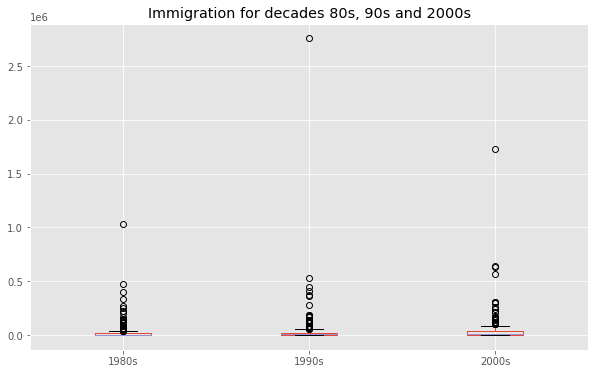

In [15]:
box_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration for decades 80s, 90s and 2000s')
plt.show()


Above box plots are not that clear. Let us increase fig height and see.

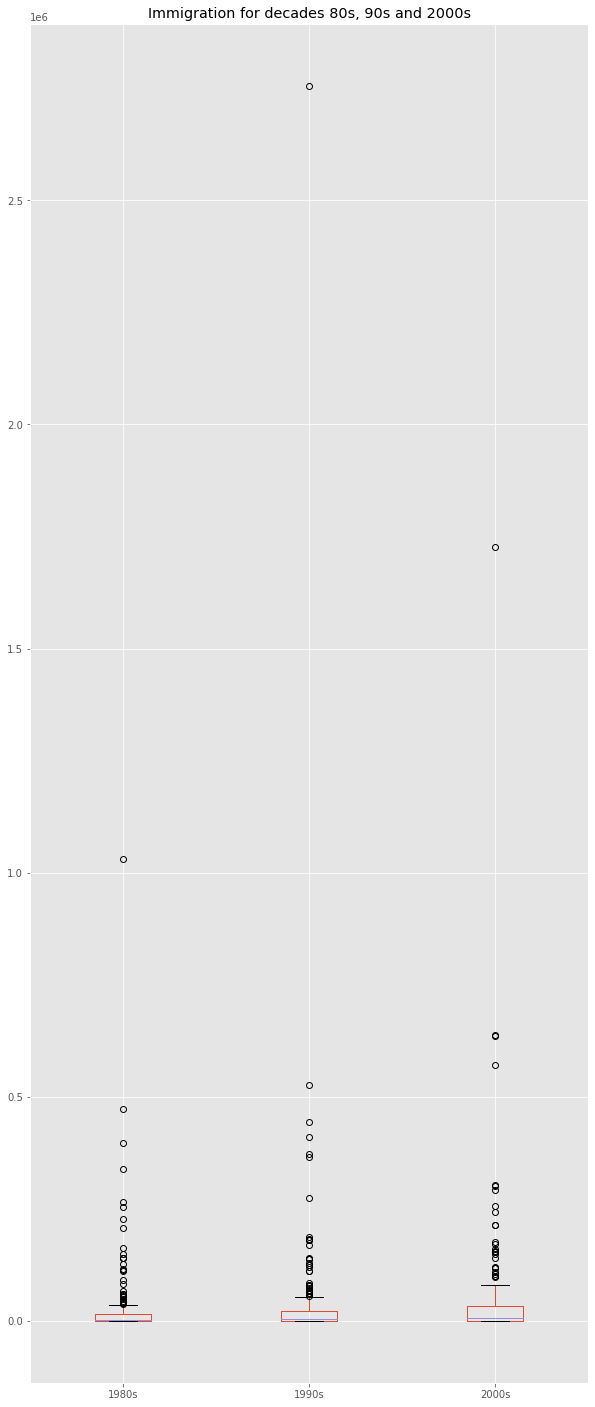

In [16]:
box_df.plot(kind='box', figsize=(10, 25))
plt.title('Immigration for decades 80s, 90s and 2000s')
plt.show()

Now it can be seen that box plots are too condensed due to the presence of large number of countries having immigration's count way above than the max of box plots. Let's consider only top 15 countries.

### 2. Immigration from Top 15 countries: trend by decades

In [17]:
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top15 = df.head(15)

In [18]:
# slice the original dataframe df to create a series for each decade
df_80 = df_top15.loc[:, years_80s].sum(axis=1) 
df_90 = df_top15.loc[:, years_90s].sum(axis=1) 
df_00 = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
box_df_15 = pd.DataFrame({'1980s': df_80, '1990s': df_90, '2000s':df_00}) 

# display dataframe
box_df_15.head()

,1980s,1990s,2000s
Country,,,
Mexico,1030862,2756072,1727614
Philippines,473831,526679,571405
China,266417,410634,637400
India,253781,371733,635195
Viet Nam,396110,443079,302043


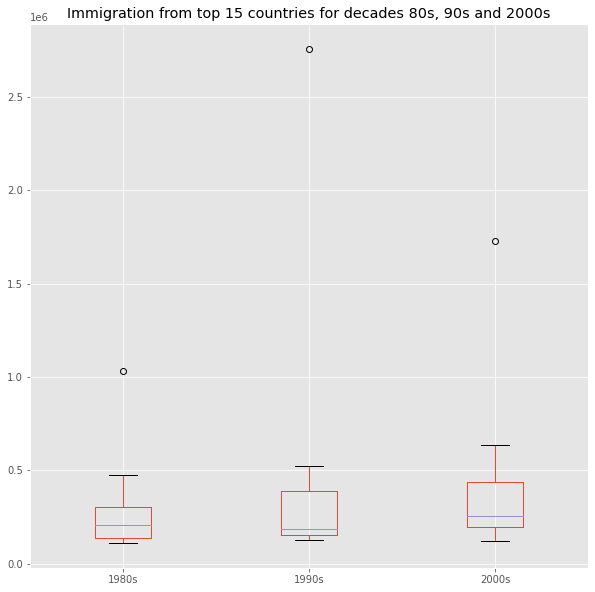

In [19]:
box_df_15.plot(kind='box', figsize=(10, 10))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [20]:
box_df_15['2000s'].describe().apply(lambda x: format(x, 'f'))

count         15.000000
mean      401366.466667
std       404366.011178
min       120235.000000
25%       195173.000000
50%       256566.000000
75%       437591.500000
max      1727614.000000
Name: 2000s, dtype: object

We can see that even after considering the top 15 countries only at a time, there are few outliers. For any count to be an outlier, the data value must be:

larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>
* Q1 (25%) = 195,173 <br>
* Q3 (75%) = 437,591.5 <br>
* IQR = Q3 - Q1 = 242,418.5 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 437,591.5 + (1.5 * 242,418.5) <br>
Outlier > 801,219.25

In [21]:
# let's check how many entries fall above the outlier threshold 
box_df_15[box_df_15['2000s']> 801219.25]

,1980s,1990s,2000s
Country,,,
Mexico,1030862,2756072,1727614


**Thus, as seen in the box plot too, our calculation also states that there is only one outlier considering immigration data of top 15 countries and that country is "Mexico".**

### 3. Total immigration trend by years

In [32]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

# reset the index to put in back in as a column in the df_total dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980,516042
1,1981,583582
2,1982,565596
3,1983,534736
4,1984,521957


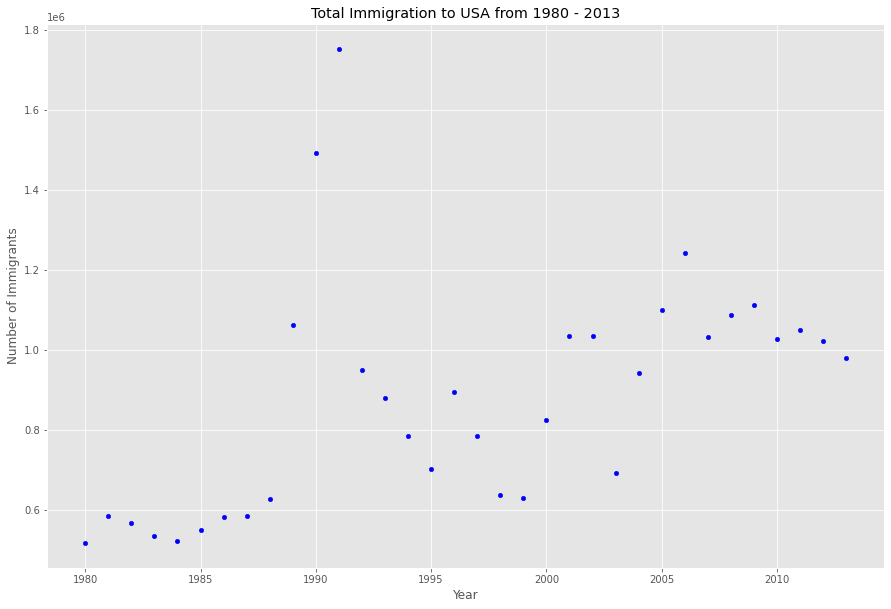

In [33]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(15, 10), color='blue')
plt.title('Total Immigration to USA from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

**So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2014.**

In [34]:
x = df_total['year']      # year on x-axis
y = df_total['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 1.41217123e+04, -2.73177737e+07])

Above produced array as a result of the fit is of the form (slope, intercept). Let's plot the fit on our scatter plot.

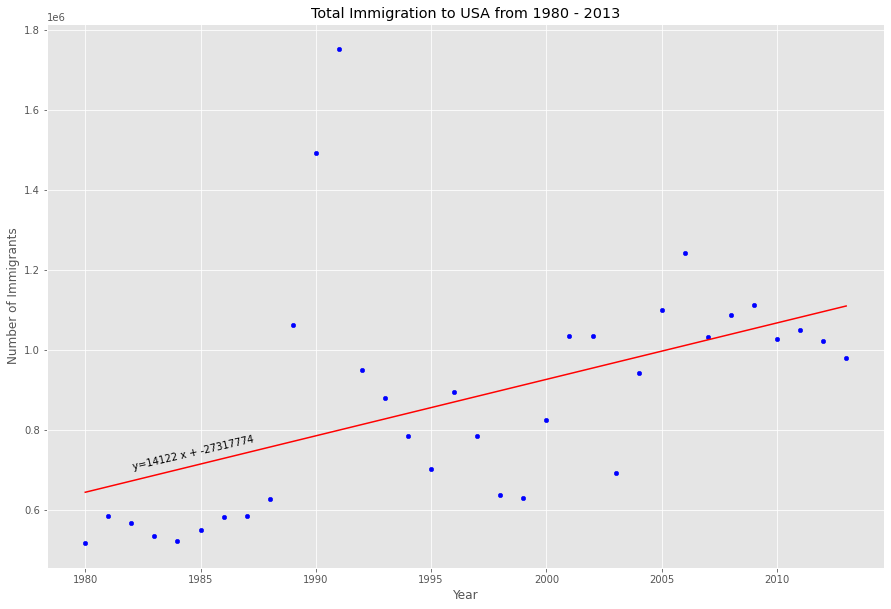

'No. Immigrants = 14122 * Year + -27317774'

In [35]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(15, 10), color='blue')

plt.title('Total Immigration to USA from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(1982,700000), rotation=13)

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [36]:
x_year = 2014
print("The estimated immigrants in 2014 as per the given data ={:,.2f}".format(fit[0] * x_year + fit[1]))

The estimated immigrants in 2014 as per the given data =1,123,354.88


### 4. Top 15 contributing countries

In [37]:
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df.head(15)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,Latin America and the Caribbean,Central America,Less developed regions,56680,101268,56106,59079,57557,61077,66533,...,161445,173749,148640,189989,164920,139120,143446,146406,135028,6078548
Philippines,Asia,South-Eastern Asia,Less developed regions,42316,43772,45102,41546,42768,47978,52558,...,60746,74606,72596,54030,60029,58173,57011,57327,54446,1798872
China,Asia,Eastern Asia,Less developed regions,27651,25803,27100,25777,23363,24787,25106,...,69933,87307,76655,80271,64238,70863,87016,81784,71798,1625912
India,Asia,Southern Asia,Less developed regions,22607,21522,21738,25451,24964,26026,26227,...,84680,61369,65353,63352,57304,69162,69013,66434,68458,1533776
Viet Nam,Asia,South-Eastern Asia,Less developed regions,43483,55631,72553,37560,37236,31895,29993,...,32784,30691,28691,31497,29234,30632,34157,28304,27101,1261426
Dominican Republic,Latin America and the Caribbean,Caribbean,Less developed regions,17245,18220,17451,22058,23147,23787,26175,...,27503,38068,28024,31879,49414,53870,46109,41566,41311,1067939
Republic of Korea,Asia,Eastern Asia,Less developed regions,32320,32663,31724,33339,33042,35253,35776,...,26562,24386,22405,26666,25859,22227,22824,20846,23166,830641
Cuba,Latin America and the Caribbean,Caribbean,Less developed regions,15054,10858,8209,8978,10599,20334,33114,...,36261,45614,29104,49500,38954,33573,36452,32820,32219,772908
El Salvador,Latin America and the Caribbean,Central America,Less developed regions,6101,8210,7107,8596,8787,10156,10929,...,21359,31782,21127,19659,19909,18806,18667,16256,18260,743993


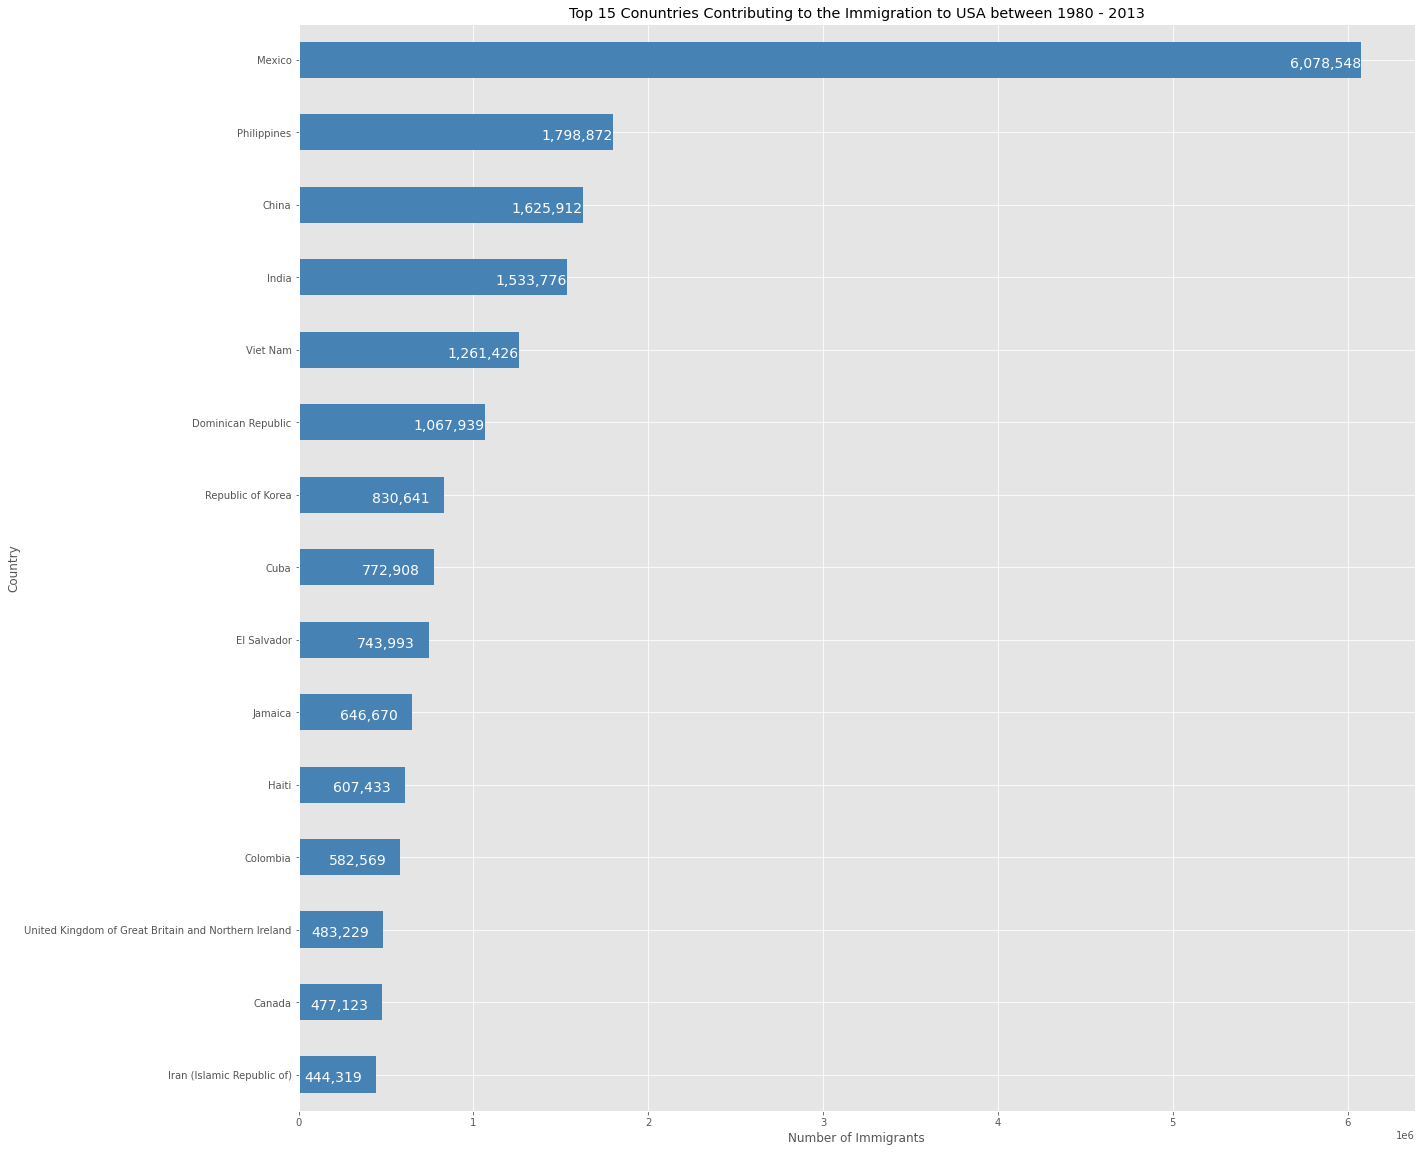

In [38]:
df_top15 = df['Total'].head(15).sort_values()
df_top15.plot(kind='barh', figsize=(20, 20), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to USA between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 410000, index - 0.10), color='white', fontsize=14)

plt.show()

Above, **Mexico seem to contribute the highest immigration with a very significant proportion.**

Let's compare the difference of proportion between top 5 contributing countries.

### 4. Top 5 countries

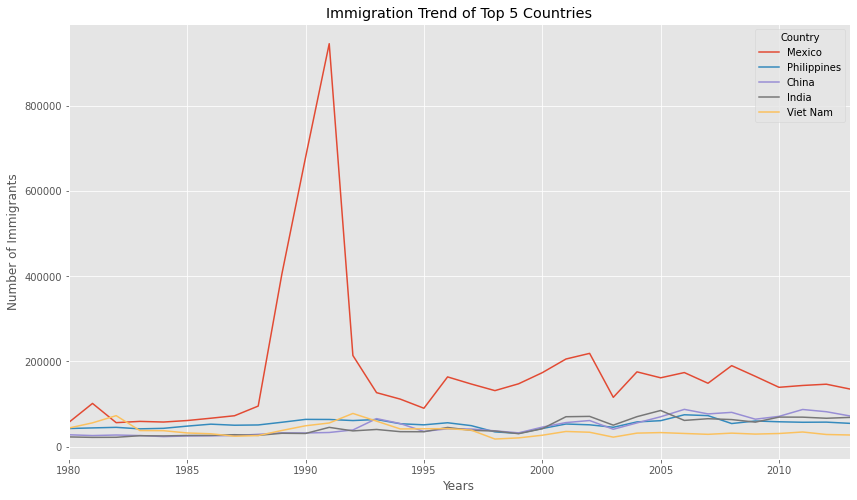

In [39]:
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose() 
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

We can even use 'Area Plots'. By default area plots are stacked, needed to be manually set stacked=False for the results similar as follow:

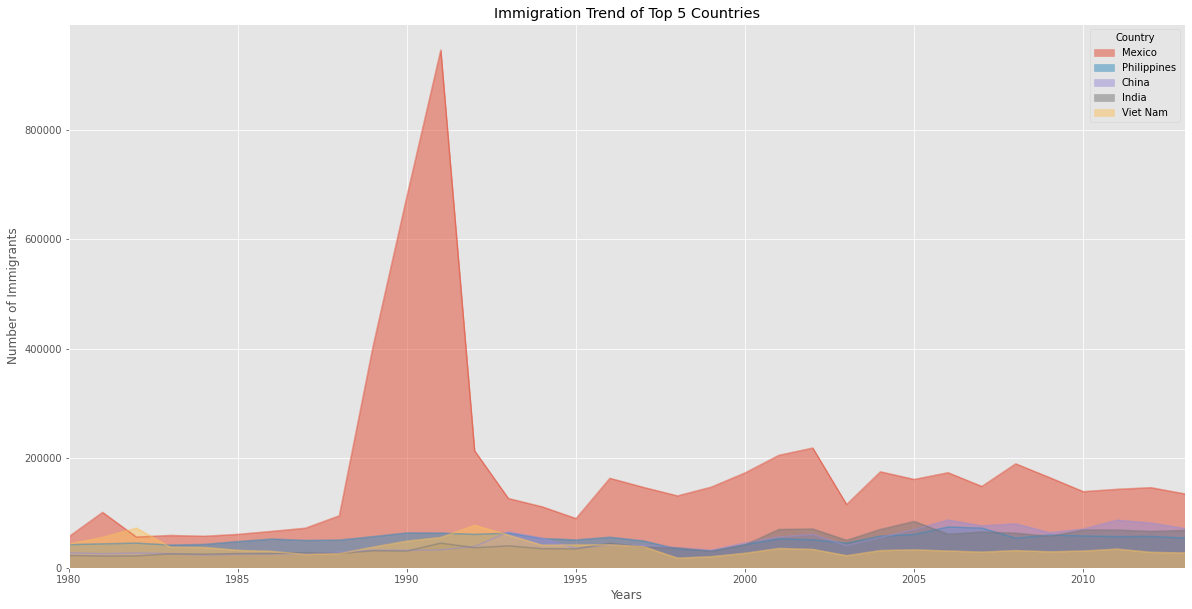

In [40]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Surprising, isn't it? There were 9,46,167 immigrants the immigrated to US from Mexico in the year 1991. Let us analyse more about Mexican immigrants year by year.

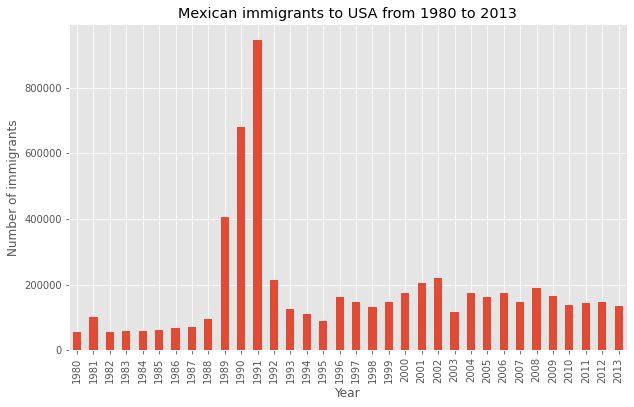

In [41]:
df_mexico = df.loc['Mexico', years]
df_mexico.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Mexican immigrants to USA from 1980 to 2013')

plt.show()

U.S. employment increased by 1.59 million in early 1990s, the first full year of recovery after the 1991 recession and to recover this many mexicans immigrated highly correlated with the US employment.

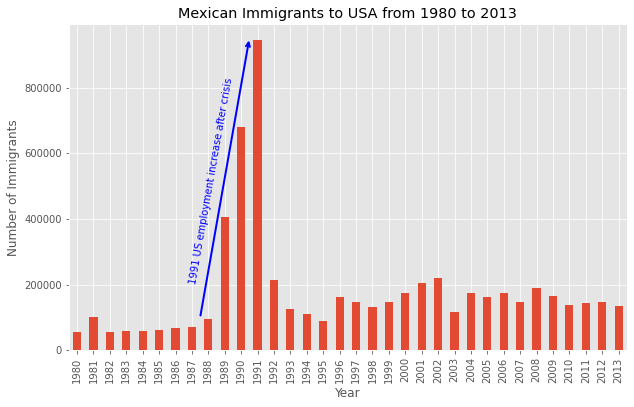

In [42]:
df_mexico.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Mexican Immigrants to USA from 1980 to 2013')

# Annotate arrow
plt.annotate('',
             xy=(10.5, 950000), 
             xytext=(7.5, 100000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('1991 US employment increase after crisis',
             xy=(6.75, 200000),
             rotation=80,
             va='bottom',
             ha='left',
             color='blue',
            )

plt.show()

<a id="3"></a>
## Continent Wise Analysis
----

In [43]:
df_continents = df.groupby('Continent', axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,13813,14846,14098,14858,15334,16875,17268,17537,18680,24917,...,85077,117403,94695,105903,127039,101351,100374,107221,98245,1749673
Asia,235826,263980,303467,261218,243915,249919,254900,245711,254646,298160,...,402526,432247,388844,389950,405273,415326,445436,424263,395156,10763387
Europe,58428,54631,51075,50865,55073,56512,56659,55498,58315,68133,...,155995,132617,96885,94325,95444,80451,77618,78630,83719,3148363
Latin America and the Caribbean,190193,234519,182121,192692,193037,209465,238128,248693,278889,653649,...,426396,533256,430012,476310,461582,410106,406770,393767,382882,13479948
Northern America,14023,11557,11127,11695,10950,11535,11212,12031,11950,12441,...,22177,18700,15774,15417,16429,13601,13140,13296,13588,485189
Oceania,3759,4049,3708,3408,3648,3908,3753,3873,3773,4353,...,6521,7365,6085,5249,5563,5337,4962,4725,5265,165087


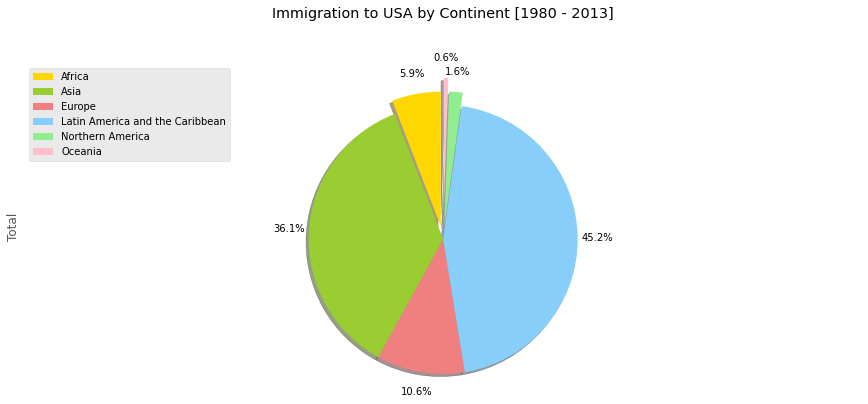

In [44]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to USA by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

Now, to measure the immigration from each on the same scale, we will apply Feature Scaling.

In [45]:
df_bubble = df_continents.transpose()
df_bubble.index.name = 'Year' # make 'year' a column
df_bubble.reset_index(inplace=True)   # set index 0 to n
df_bubble = df_bubble.iloc[:34] # remove total i.e. 34th row
df_bubble['Year'] = df_bubble['Year'].apply(lambda x: int(x))  #convert string year to int
df_bubble

Continent,Year,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
0,1980,13813,235826,58428,190193,14023,3759
1,1981,14846,263980,54631,234519,11557,4049
2,1982,14098,303467,51075,182121,11127,3708
3,1983,14858,261218,50865,192692,11695,3408
4,1984,15334,243915,55073,193037,10950,3648
5,1985,16875,249919,56512,209465,11535,3908
6,1986,17268,254900,56659,238128,11212,3753
7,1987,17537,245711,55498,248693,12031,3873
8,1988,18680,254646,58315,278889,11950,3773
9,1989,24917,298160,68133,653649,12441,4353


In [46]:
continent_names = df_bubble.columns[1:]
continent_names

Index(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania'],
      dtype='object', name='Continent')

In [47]:
def do_normalize(name):
    num = (df_bubble[name] - df_bubble[name].min())
    den = (df_bubble[name].max() - df_bubble[name].min())
    return num/den

In [48]:
norm_Africa = do_normalize('Africa')
norm_Asia = do_normalize('Asia')
norm_Europe = do_normalize('Europe')
norm_Latin_America = do_normalize('Latin America and the Caribbean')
norm_Northern_America = do_normalize('Northern America')
norm_Oceania = do_normalize('Oceania')

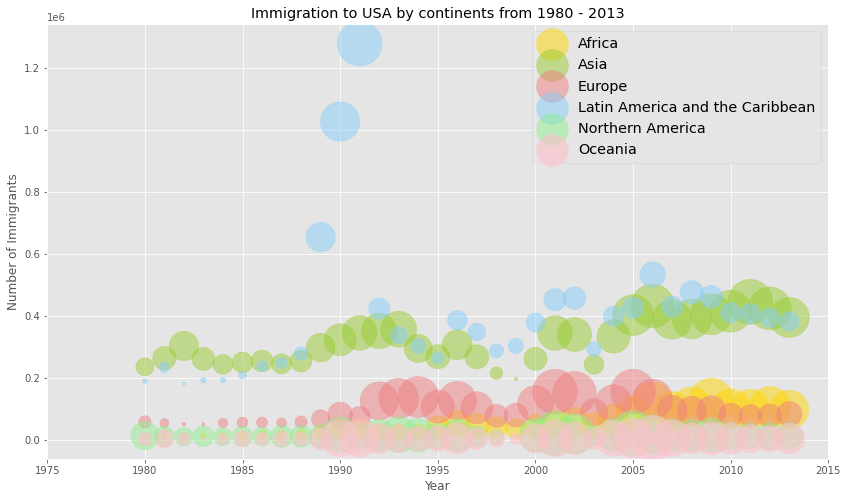

In [49]:
ax0 = df_bubble.plot(kind='scatter',
                    x='Year',
                    y='Africa',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='gold',
                    s= norm_Africa * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                   )


ax1 = df_bubble.plot(kind='scatter',
                    x='Year',
                    y='Asia',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='yellowgreen',
                    s= norm_Asia* 2000 + 10,  # pass in weights
                    ax = ax0
                   )

ax2 = df_bubble.plot(kind='scatter',
                    x='Year',
                    y='Europe',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='lightcoral',
                    s= norm_Europe* 2000 + 10,  # pass in weights
                    ax = ax0
                   )

ax3 = df_bubble.plot(kind='scatter',
                    x='Year',
                    y='Latin America and the Caribbean',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='lightskyblue',
                    s= norm_Latin_America* 2000 + 10,  # pass in weights
                    ax = ax0
                   )

ax4 = df_bubble.plot(kind='scatter',
                    x='Year',
                    y='Northern America',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='lightgreen',
                    s= norm_Northern_America* 2000 + 10,  # pass in weights
                    ax = ax0
                   )

ax5 = df_bubble.plot(kind='scatter',
                    x='Year',
                    y='Oceania',
                    figsize=(14, 8),
                    alpha=0.6,                  # transparency
                    color='pink',
                    s= norm_Oceania* 2000 + 10,  # pass in weights
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration to USA by continents from 1980 - 2013')
ax0.legend(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania'], loc='upper right', fontsize='x-large')

<a id="4"></a>
## Development Status of Origin of the Immigrants
----

In [50]:
df_dev = df.groupby('DevName', axis=0).sum()
df_dev

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
DevName,,,,,,,,,,,,,,,,,,,,,
Less developed regions,437147,511535,497462,466199,449987,474040,508126,509796,549452,973895,...,907266,1077657,909323,967234,988198,922425,948235,920687,871943,25859372
More developed regions,78895,72047,68134,68537,71970,74174,73794,73547,76801,87758,...,191426,163931,122972,119920,123132,103747,100065,101215,106912,3932275


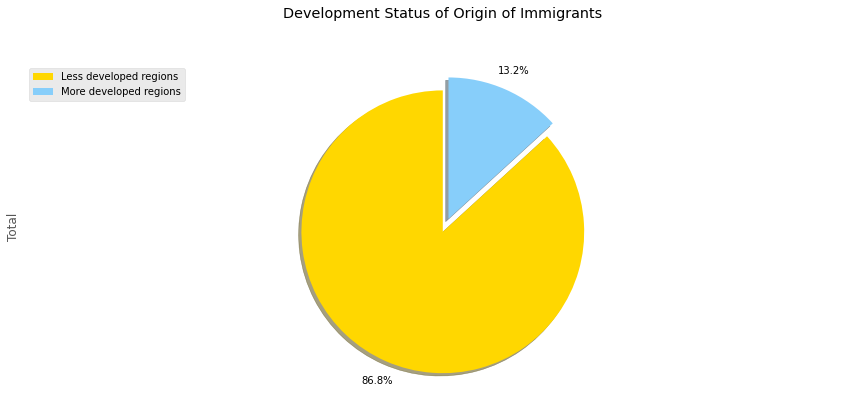

In [51]:
colors_list = ['gold','lightskyblue']
explode_list = [0.1, 0.0]

df_dev['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Development Status of Origin of Immigrants', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_dev.index, loc='upper left') 

plt.show()

That is a huge difference between the total population of immigrants that came from "More developed regions" and "Less developed regions". Let's analyse how this difference grew up over the years using a bubble chart.

In [52]:
df_dev = df_dev.transpose()
df_dev.reset_index(inplace=True)
df_dev.rename(columns={'index':'Year'}, inplace=True)
df_dev = df_dev.iloc[:34]
df_dev['Year'] = df_dev['Year'].apply(lambda x: int(x))  #convert string year to int
df_dev

DevName,Year,Less developed regions,More developed regions
0,1980,437147,78895
1,1981,511535,72047
2,1982,497462,68134
3,1983,466199,68537
4,1984,449987,71970
5,1985,474040,74174
6,1986,508126,73794
7,1987,509796,73547
8,1988,549452,76801
9,1989,973895,87758


In [53]:
def do_normalize2(name):
    num = (df_dev[name] - df_dev[name].min())
    den = (df_dev[name].max() - df_dev[name].min())
    return num/den

In [54]:
norm_less_dev = do_normalize2('Less developed regions')
norm_more_dev = do_normalize2('More developed regions')

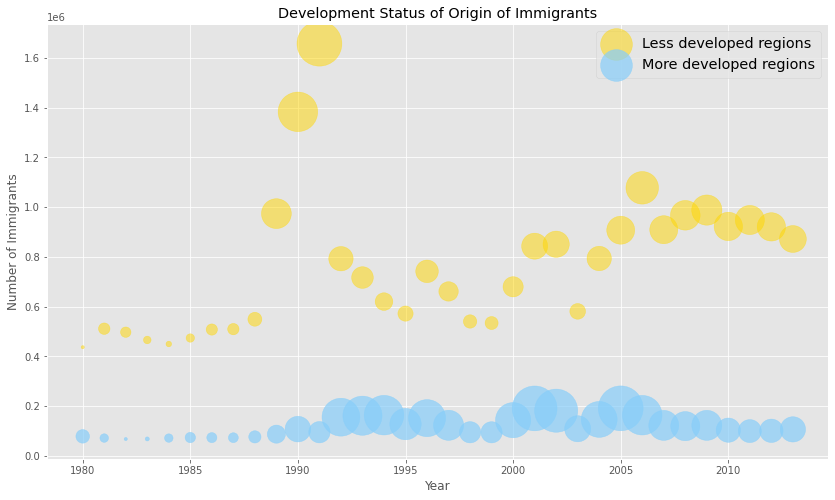

In [55]:
ax0 = df_dev.plot(kind='scatter',
                    x='Year',
                    y='Less developed regions',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='gold',
                    s= norm_less_dev * 2000 + 10,  # pass in weights
#                     xlim=(1975, 2015)
                   )


ax1 = df_dev.plot(kind='scatter',
                    x='Year',
                    y= 'More developed regions',
                    figsize=(14, 8),
                    alpha=0.7,                  # transparency
                    color='lightskyblue',
                    s= norm_more_dev * 2000 + 10,  # pass in weights
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Development Status of Origin of Immigrants')
ax0.legend(['Less developed regions', 'More developed regions'], loc='upper right', fontsize='x-large')
plt.show()

<a id="5"></a>
## Conclusion
----

Overall the immigration to USA shows a positive growth in numbers and immigration proportions from the different countries, continents or regions can be estimated for upcoming years following the past patterns. There are more immigrants coming from Less developed countries than from the more developed countries.